In [5]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import datetime as dt
import matplotlib.pyplot as plt

#We will use Yahoo Finance API to import ticker informations
import yfinance as yf

### 1. Introduction

It is the mark of a prudent investor to have some idea of the possible losses that may result from typical movements of financial markets. 

As part of the search for more transparecy in investments, there has gron up the concept of __Value at Risk (VaR)__ as a measure of the possible downside from an investment or portfolio

### 2. Definition

The value at risk is an estimate with a given degree of confidence, of how much one can lose over a given time horizon. In symbols, we can write this as

$$ \mathbb{P}(\delta V \leq  - VaR) = 1 - c$$

- VaR is computed assuming normal market circumstances. Extreme market conditions are not considered. 
- To compute it, we will need asset prices, volatility and correlation. 

### 3. VaR For a single asset: Parametric Method

$\delta V = R_t \times \Delta S$, with $S$ being the current asset price and $\Delta$ being our position in stock. We assume $R_t$ follows a normal distribution with mean $\mu \times \delta t$ and standard deviation $\sigma \times (\delta t)^{\frac{1}{2}}$

Thus, following past definition of the VaR we have that, 

$$VaR = \Delta S(\mu  \delta t - \sigma  (\delta t)^{\frac{1}{2}} \alpha (1 - c))$$

With $\alpha(.)$ being the cdf of a standard normal distribution. 

#### Method 1: Historical VaR

For this method it makes little difference whether we perform the calculations for a single stock or for a portfolio with a broader exposure. 

##### Definition
This method involves __calculating the portfolio's historical returns over a chosen time period and then ranking these returns from the worst to the best. The VaR is then determined by identifying the return that corresponds to the chosen level of confidence__, such as the 95th percentile, and multiplying it by the portfolio's current value.

##### Example
For example, if a portfolio has a value of 1 million dollars and the VaR at the 95th percentile is calculated to be 100,000 USD using the historical method, this means that there is a 5% chance that the portfolio may experience losses greater than $100,000 over the chosen time period.


##### Pros

- Simplicity: The historical method is relatively straightforward and easy to implement, as it only requires historical data and basic statistical calculations.
- Real-world data: Usage of actual historical market data to estimate the potential losses can make it more realistic than other methods that rely on assumptions or models.
- Flexibility: This method has the capacity to adapt to different time horizons and confidence levels, depending on the user's needs.

##### Cons

- Limitations: Based on past market conditions and may not reflect future market behavior or unforeseen events, which can lead to inaccurate VaR estimates.
- Shortcomings: The historical method does not account for extreme events that may not have occurred in the past, such as "black swan" events, which can result in underestimating the true risk.
- Sensitivity to data quality: The quality of the historical data used in the method can greatly affect the VaR calculations, and the method may not work well if the data is incomplete or biased.

[*********************100%***********************]  7 of 7 completed


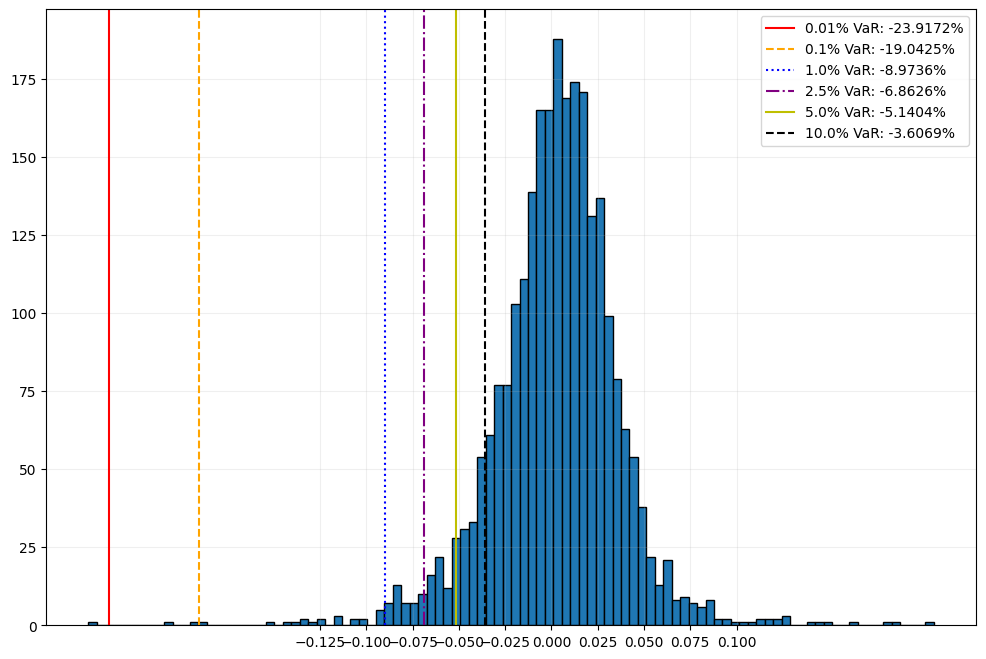

[['0.01%', '-23.917%'],
 ['0.1%', '-19.043%'],
 ['1.0%', '-8.974%'],
 ['2.5%', '-6.863%'],
 ['5.0%', '-5.140%'],
 ['10.0%', '-3.607%']]

In [11]:
def historical_var(start_date = dt.date(year = 2013 , month = 1 ,day = 1),
                    tickers = ['GS','MS','JPM','C', 'MSFT','BAC', 'WFC'],
                    weights = "Equally Weighted",
                    period = "W",
                   confidence_levels=[0.01,0.1,1.0,2.5,5.0,10.0],
                   plotting = True
                   ):
######## STEP 1: We define weights and number of days and time horizon for our historical VaR.
    if period =="W": period_frame = 5
    elif period == "M": period_frame = 20
    elif period =="Y": period_frame = 252
    if weights == "Equally Weighted":
        weights = np.full(len(tickers), 1/len(tickers))
######## STEP 2: Retrieving data from tickers from 2013 onwards.
    end_date = dt.date.today()
    price_data = pd.DataFrame(yf.download(tickers, start = start_date,
    end = end_date)['Close']).dropna().round(2)
######## STEP 3: Cleaning data and computing portfolio returns.
    returns = price_data.pct_change(periods=period_frame).dropna().round(4)
    portfolio_returns = returns.dot(weights)
    portfolio_returns = portfolio_returns.sort_values(ascending = True)
     #empty list to append the different VaR values
    rows = []
######## STEP 4: VaR will be the percentile on returns dataframe for each confidence interval.
    for i in range(len(confidence_levels)):
        VaR = np.percentile(portfolio_returns, confidence_levels[i])
        rows.append([str(confidence_levels[i])+'%', '{:.3f}%'.format(VaR*100)])
######## STEP 5: Plot empirical distribution and historical VaR for different confidence intervals.
    if plotting:
        plt.rcParams["figure.figsize"] = (12, 8)
        plt.hist(portfolio_returns, bins=100, edgecolor='black')
        colors = ['r','orange','b', 'purple','y', 'black']
        linestyle_str = ['-', '--',':','-.','-','--']
        for i in range(len(confidence_levels)):
            VaR = np.percentile(portfolio_returns, confidence_levels[i])
            label = '{}% VaR: {:.4f}%'.format(confidence_levels[i], VaR*100)
            plt.axvline(x=VaR, color=colors[i], linestyle=linestyle_str[i], label=label)
            plt.legend()
            xticks = np.arange(-0.125, 0.125, 0.025)
            plt.grid(True,alpha=0.2)
            plt.xticks(xticks)
        plt.show()
    return portfolio_returns, rows

historical_var()